In [105]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import TruncatedSVD
from sklearn.model_selection import train_test_split
import sys


In [106]:
filename = 'courseRecSys.xlsx'
splitProp = 0.95

In [107]:
def read_data(filename):
    df = pd.read_excel(filename,
    header=0,
    index_col=False,
    keep_default_na=True
    )
    return df

In [108]:
def preprocess(df):
    df=df.drop(['Start time','Completion time','Email','Name','Name(not mandatory)\n','ID'], axis=1)
    #replacing nan with mean of users
    # df["avg"] = df.mean(axis = 1, skipna=True, numeric_only=True)
    # df=df.apply(lambda row: row.fillna(row["avg"]), axis=1)
    # df = df.drop(["avg"],axis =1)
    #replacing nan with mean of courses
    df["avg"] = df.mean(axis = 0, skipna=True, numeric_only=True)
    df=df.apply(lambda x: x.fillna(x.mean()),axis=0)
    df = df.drop(["avg"],axis =1)
    return df

In [109]:
na_df = read_data(filename)
na_df = na_df.drop(['Start time','Completion time','Email','Name','Name(not mandatory)\n','ID'], axis=1)
na_df

,Data Structures and Algorithms,Computer Architecture\n,Discrete Mathematics\n,Economics,Programming-2,Machine Learning\n,Mathematics For Machine Learning\n,Visual Recognition\n,Natural Language Processing\n,Reinforcement Learning,...,Digital CMOS VLSI Design,System design with FPGA,ASIC design,VLSI Architecture Design\n,High level synthesis and optimization of Digital Circuits,Digital Sociology,Privacy in the Digital Age,Technology Ethics and AI,Techno-economics of networks,The Web and the Mind
0,0.30,0.85,0.85,0.90,0.70,0.70,0.80,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.6,NaN,NaN,NaN
1,0.70,0.80,0.20,0.80,0.80,0.50,0.10,0.20,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.5,NaN,NaN,NaN
2,0.70,0.00,1.00,1.00,1.00,1.00,1.00,0.80,0.9,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.4,NaN,NaN,NaN
3,0.65,0.70,0.20,0.75,0.75,0.75,0.75,0.75,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.8,NaN,NaN,0.8,NaN
4,0.70,0.60,0.20,0.00,0.80,0.50,0.60,0.40,0.4,0.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,0.00,1.00,0.50,0.70,0.60,0.50,0.30,0.70,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
158,1.00,0.00,0.00,0.70,0.70,0.00,0.00,0.00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.2
159,0.60,0.30,0.40,0.90,0.80,0.70,0.40,0.50,0.4,0.2,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0
160,0.80,0.60,0.20,0.40,0.70,0.70,0.80,NaN,NaN,0.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [110]:
! pip install openpyxl

In [111]:
df=read_data(filename)
df = preprocess(df)
df

,Data Structures and Algorithms,Computer Architecture\n,Discrete Mathematics\n,Economics,Programming-2,Machine Learning\n,Mathematics For Machine Learning\n,Visual Recognition\n,Natural Language Processing\n,Reinforcement Learning,...,Digital CMOS VLSI Design,System design with FPGA,ASIC design,VLSI Architecture Design\n,High level synthesis and optimization of Digital Circuits,Digital Sociology,Privacy in the Digital Age,Technology Ethics and AI,Techno-economics of networks,The Web and the Mind
0,0.30,0.85,0.85,0.90,0.70,0.70,0.80,0.620098,0.572638,0.603495,...,0.251538,0.246316,0.214805,0.234868,0.168056,0.318243,0.600000,0.423286,0.396622,0.510897
1,0.70,0.80,0.20,0.80,0.80,0.50,0.10,0.200000,0.572638,0.603495,...,0.251538,0.246316,0.214805,0.234868,0.168056,0.318243,0.500000,0.423286,0.396622,0.510897
2,0.70,0.00,1.00,1.00,1.00,1.00,1.00,0.800000,0.900000,1.000000,...,0.251538,0.246316,0.214805,0.234868,0.168056,0.318243,0.400000,0.423286,0.396622,0.510897
3,0.65,0.70,0.20,0.75,0.75,0.75,0.75,0.750000,0.572638,0.603495,...,0.251538,0.246316,0.214805,0.234868,0.168056,0.800000,0.452708,0.423286,0.800000,0.510897
4,0.70,0.60,0.20,0.00,0.80,0.50,0.60,0.400000,0.400000,0.200000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,0.00,1.00,0.50,0.70,0.60,0.50,0.30,0.700000,0.572638,0.603495,...,0.251538,0.246316,0.214805,0.234868,0.168056,0.318243,0.000000,0.423286,0.396622,0.510897
158,1.00,0.00,0.00,0.70,0.70,0.00,0.00,0.000000,0.572638,0.603495,...,0.251538,0.246316,0.214805,0.234868,0.168056,0.318243,0.452708,0.423286,0.396622,0.200000
159,0.60,0.30,0.40,0.90,0.80,0.70,0.40,0.500000,0.400000,0.200000,...,0.251538,0.246316,0.214805,0.234868,0.168056,0.318243,1.000000,0.423286,0.396622,1.000000
160,0.80,0.60,0.20,0.40,0.70,0.70,0.80,0.620098,0.572638,0.700000,...,0.251538,0.246316,0.214805,0.234868,0.168056,0.318243,0.452708,0.423286,0.396622,0.510897


change 0.5 to average of ratings of that user

In [112]:
""" train,test = train_test_split(df,train_size=splitProp, random_state=42,shuffle = True) """

' train,test = train_test_split(df,train_size=splitProp, random_state=42,shuffle = True) '

In [113]:
train,test = train_test_split(na_df,train_size=splitProp, random_state=42,shuffle = True)

In [114]:
test["avg"] = test.mean(axis = 1, skipna=True, numeric_only=True)
test=test.apply(lambda row: row.fillna(row["avg"]), axis=1)
test = test.drop(["avg"],axis =1)

In [115]:
""" df.shape """

' df.shape '

In [116]:
# test.shape

In [117]:
# df.isna().sum()

In [118]:
courses = df.columns
courses

Index(['Data Structures and Algorithms', 'Computer Architecture\n',
       'Discrete Mathematics\n', 'Economics', 'Programming-2',
       'Machine Learning\n', 'Mathematics For Machine Learning\n',
       'Visual Recognition\n', 'Natural Language Processing\n',
       'Reinforcement Learning', 'Software Production Engineering\n',
       'Computer Graphics\n', 'Data Visualization\n',
       'Programming Languages\n', 'Cloud Computing\n',
       'Digital CMOS VLSI Design ', 'System design with FPGA ', 'ASIC design ',
       'VLSI Architecture Design\n',
       'High level synthesis and optimization of Digital Circuits ',
       'Digital Sociology ', 'Privacy in the Digital Age',
       'Technology Ethics and AI ', 'Techno-economics of networks ',
       'The Web and the Mind '],
      dtype='object')

In [119]:
core_courses = ['Data Structures and Algorithms','Computer Architecture\n','Discrete Mathematics\n','Economics','Programming-2']

In [120]:
def visualize(point):
    wcss = []  #Within Cluster Sum of Squares
    for number_of_clusters in range(1, 15): 
        kmeans = KMeans(n_clusters = number_of_clusters, random_state = 42)
        kmeans.fit(df[core_courses]) 
        wcss.append(kmeans.inertia_)
    ks = np.arange(1,15,1)
    plt.plot(ks, wcss)
    plt.axvline(point, linestyle='--', color='r')
    return wcss

[82.11226015529861,
 63.24078648485308,
 51.59371019141971,
 44.925208436514524,
 39.88330675972086,
 36.1746361281475,
 33.398702023260036,
 30.5695359693512,
 28.1421428563879,
 25.519097800451988,
 24.303521924994463,
 22.250775245363172,
 21.26505642848125,
 19.7185773653146]

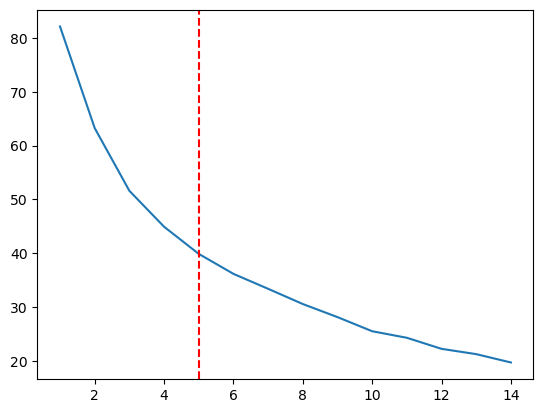

In [121]:
visualize(5)

In [122]:
def K_means(df, num_clusters, iters):
    np_dat = df.to_numpy()
    # Initialize the centroids
    range_min = np.min(np_dat, axis = 0)
    range_max = np.max(np_dat, axis = 0)
    curr_centroids = []
    np.random.seed(120)
    for i in range(num_clusters):
        curr_centroids.append(np.random.uniform(range_min, range_max))
    clusters = {}
    for it in range(iters):
        # Repopulate clusters
        clusters.clear()
        for j in range(np_dat.shape[0]):
            datapoint = np_dat[j]
            min = sys.maxsize
            min_index = 10
            for k in range(num_clusters):
                dist = np.linalg.norm(curr_centroids[k] - datapoint)
                if(dist < min):
                    min = dist
                    min_index = k
            if(clusters.get(str(min_index)) == None):
                clusters[str(min_index)] = []
            clusters[str(min_index)].append(j)
        
        # Recalculate Centroids
        new_centroids = []
        for k in range(num_clusters):
            key = str(k)
            if(clusters.get(key) == None): 
                n_centr = curr_centroids[k]
                #n_centr = np.random.uniform(range_min, range_max)
            else: n_centr = np.mean(np_dat[np.array(clusters[key])], axis = 0)
            new_centroids.append(n_centr)
        
        #if((np.not_equal(new_centroids, curr_centroids).any()) != True ): break
        curr_centroids = new_centroids
        #print(it)
    return clusters


In [123]:
def get_clustered_df(df,num_clusters):
    """ kmeans = KMeans(n_clusters = num_clusters, random_state = 42)
    clustered_matrix = kmeans.fit_predict(df[core_courses]) 
    print(clustered_matrix.shape) """
    cluster_dict = K_means(df[core_courses], num_clusters, 50)
    print(cluster_dict)
    clustered_df =[]
    arr = df.to_numpy()
    for k in range(num_clusters):
        key = str(k)
        centr = np.nanmean(arr[np.array(cluster_dict[key])], axis = 0)
        clustered_df.append(centr)
    """ for i in range(k):
        users = 0
        s=np.zeros(25)
        for j in range(len(clustered_matrix)):#162
            
            if clustered_matrix[j]==i:
                s+=arr[j]
                users = users + 1
        mean = s/users
        clustered_df.append(mean) """
    return clustered_df

In [124]:
def old_get_clustered_df(df,num_clusters):
    kmeans = KMeans(n_clusters = num_clusters, random_state = 42)
    clustered_matrix = kmeans.fit_predict(df[core_courses]) 
    # print(clustered_matrix.shape)
    arr = df.to_numpy()
    clustered_df = []
    for i in range(num_clusters):
        users = 0
        s=np.zeros(25)
        for j in range(len(clustered_matrix)):#162
            
            if clustered_matrix[j]==i:
                s+=arr[j]
                users = users + 1
        mean = s/users
        clustered_df.append(mean)
    return clustered_df

In [125]:
# clustered_df = old_get_clustered_df(df,10)

In [126]:
""" clustered_df """

' clustered_df '

In [127]:
nan_clustered_df = get_clustered_df(na_df,10)

{'6': [0, 11, 17, 33, 41, 58, 70, 117, 157, 161], '9': [1, 3, 15, 20, 27, 31, 48, 49, 50, 55, 71, 72, 74, 75, 78, 79, 86, 88, 95, 106, 109, 147, 152, 153], '2': [2, 56, 63, 94, 104, 118, 125, 134, 143, 145, 146, 156], '8': [4, 28, 29, 30, 32, 35, 47, 64, 80, 84, 89, 98, 120, 132, 135, 142, 151, 160], '1': [5, 8, 10, 13, 14, 16, 18, 19, 21, 23, 24, 25, 34, 37, 43, 45, 46, 53, 54, 57, 62, 65, 68, 69, 76, 81, 85, 87, 92, 96, 97, 103, 107, 113, 116, 119, 121, 124, 128, 129, 131, 133, 137, 138, 139, 141, 144, 148, 149, 150], '0': [6, 12, 38, 39, 51, 52, 66, 73, 77, 83, 90, 101, 105, 110, 123, 126, 130, 136, 140], '7': [7, 22, 40, 42, 44, 59, 60, 61, 67, 93, 99, 102, 114, 154, 158, 159], '3': [9, 36, 82, 100, 112, 122, 155], '4': [26, 91, 108, 111, 115], '5': [127]}


/var/folders/sq/1c_479xx58d7g62wy3fqmnl80000gn/T/ipykernel_29369/665705604.py:11: RuntimeWarning: Mean of empty slice
  centr = np.nanmean(arr[np.array(cluster_dict[key])], axis = 0)


In [128]:
nan_clustered_df

[array([0.97105263, 0.93421053, 0.90473684, 0.15263158, 0.95      ,
        0.89411765, 0.83529412, 0.58125   , 0.80714286, 0.73571429,
        0.59333333, 0.4       , 0.59285714, 0.52857143, 0.43571429,
        0.36923077, 0.38333333, 0.30833333, 0.29166667, 0.225     ,
        0.16818182, 0.54      , 0.40272727, 0.15909091, 0.69090909]),
 array([0.9058    , 0.8428    , 0.8074    , 0.8232    , 0.9188    ,
        0.82704545, 0.82659091, 0.72567568, 0.55      , 0.62592593,
        0.68928571, 0.55967742, 0.80925926, 0.64642857, 0.71346154,
        0.30555556, 0.31764706, 0.33529412, 0.31764706, 0.33529412,
        0.51944444, 0.46142857, 0.54117647, 0.66666667, 0.51388889]),
 array([0.90833333, 0.16      , 0.92083333, 0.50833333, 0.88333333,
        0.83      , 0.82      , 0.6       , 0.49      , 0.57777778,
        0.6       , 0.4       , 0.44444444, 0.43      , 0.51111111,
        0.15714286, 0.01428571, 0.01428571, 0.15714286, 0.01428571,
        0.14375   , 0.39      , 0.31428571, 

In [129]:
nan_df = pd.DataFrame(nan_clustered_df, columns = courses)
nan_df

,Data Structures and Algorithms,Computer Architecture\n,Discrete Mathematics\n,Economics,Programming-2,Machine Learning\n,Mathematics For Machine Learning\n,Visual Recognition\n,Natural Language Processing\n,Reinforcement Learning,...,Digital CMOS VLSI Design,System design with FPGA,ASIC design,VLSI Architecture Design\n,High level synthesis and optimization of Digital Circuits,Digital Sociology,Privacy in the Digital Age,Technology Ethics and AI,Techno-economics of networks,The Web and the Mind
0,0.971053,0.934211,0.904737,0.152632,0.950000,0.894118,0.835294,0.581250,0.807143,0.735714,...,0.369231,0.383333,0.308333,0.291667,0.225000,0.168182,0.540000,0.402727,0.159091,0.690909
1,0.905800,0.842800,0.807400,0.823200,0.918800,0.827045,0.826591,0.725676,0.550000,0.625926,...,0.305556,0.317647,0.335294,0.317647,0.335294,0.519444,0.461429,0.541176,0.666667,0.513889
2,0.908333,0.160000,0.920833,0.508333,0.883333,0.830000,0.820000,0.600000,0.490000,0.577778,...,0.157143,0.014286,0.014286,0.157143,0.014286,0.143750,0.390000,0.314286,0.277778,0.366667
3,0.947143,0.925714,0.848571,0.594286,0.264286,0.866667,0.800000,0.566667,0.675000,0.425000,...,0.264000,0.304000,0.068000,0.410000,0.150000,0.000000,0.183333,0.150000,0.100000,0.050000
4,0.140000,0.120000,0.580000,0.120000,1.000000,1.000000,0.900000,0.880000,0.966667,0.966667,...,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.200000,0.800000,0.700000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,0.372637,0.830000,0.806235,0.792253,0.790788,0.668061,0.648065,0.673764,0.592846,0.438138,...,0.100000,0.050000,0.000000,0.000000,0.100000,0.500000,0.578809,0.700000,0.650000,0.600000
7,0.712500,0.168750,0.225000,0.781250,0.825000,0.713333,0.537500,0.480000,0.410000,0.377778,...,0.120000,0.100000,0.160000,0.100000,0.120000,0.650000,0.585000,0.616667,0.680000,0.800000
8,0.919444,0.488889,0.177778,0.100000,0.855556,0.750000,0.547059,0.453125,0.467143,0.546000,...,0.175000,0.091667,0.100000,0.091667,0.016667,0.136364,0.225000,0.263636,0.136364,0.369231
9,0.693750,0.850000,0.195833,0.812500,0.741667,0.790000,0.612500,0.639474,0.542308,0.676923,...,0.285714,0.392308,0.335714,0.300000,0.181818,0.400000,0.600000,0.520000,0.541667,0.550000


In [130]:
nan_df["avg"] = nan_df.mean(axis = 1, skipna=True, numeric_only=True)
nan_df=nan_df.apply(lambda row: row.fillna(row["avg"]), axis=1)
nan_df = nan_df.drop(["avg"],axis =1)

In [131]:
nan_df.isna().sum()

Data Structures and Algorithms                                0
Computer Architecture\n                                       0
Discrete Mathematics\n                                        0
Economics                                                     0
Programming-2                                                 0
Machine Learning\n                                            0
Mathematics For Machine Learning\n                            0
Visual Recognition\n                                          0
Natural Language Processing\n                                 0
Reinforcement Learning                                        0
Software Production Engineering\n                             0
Computer Graphics\n                                           0
Data Visualization\n                                          0
Programming Languages\n                                       0
Cloud Computing\n                                             0
Digital CMOS VLSI Design                

In [132]:
# df = pd.DataFrame(clustered_df, columns = courses)
# df

In [133]:
def svd(A):
    
    # Step 1: Compute the transpose of A
    AT = A.T
    # Step 2: Compute the product A x AT
    ATA = A.dot(AT)
    # Step 3: Compute the eigenvalues and eigenvectors of ATA
    eigenvalues, eigenvectors = np.linalg.eig(ATA)
    # Step 4: Sort the eigenvalues in descending order
    sorted_idx = eigenvalues.argsort()[::-1]
    eigenvalues = eigenvalues[sorted_idx]
    eigenvectors = eigenvectors[:, sorted_idx]
    # Step 5: Compute the diagonal matrix Sigma
    Sigma = np.sqrt(eigenvalues)
    # Step 6: Compute the pseudo-inverse of Sigma
    inv_Sigma = np.zeros((A.shape[1], A.shape[0]))
    print(A.shape)
    inv_Sigma[:A.shape[0], :A.shape[0]] = np.diag(1.0 / Sigma)
    # Step 7: Compute the product AT x V x inv(Sigma)
    V = AT.dot(eigenvectors)
    # Step 8: Normalize the columns of V
    V = V / np.linalg.norm(V, axis=0)
    # Step 9: Compute the product A x U x Sigma^-1
    U = A.dot(V) / Sigma
    return U, Sigma, V.T

In [134]:
# U,sigma,VT = svd(np.array(clustered_df))

In [135]:
# U.shape,sigma.shape,VT.shape

In [136]:
k=6

In [137]:
def reduced_svd(k,A):
    U,sigma,VT = svd(A)
    reduced_matrix = np.dot(np.dot(U[:,:k],np.diag(sigma[:k])),VT[:k,:])
    return reduced_matrix


In [138]:
reduced_matrix = reduced_svd(k,np.array(nan_df))
# type(clustered_df)

(10, 25)


In [139]:
# reduced_matrix = truncated_matrix

In [140]:
def EuclDist(vec1,vec2):
    return np.linalg.norm(vec1 - vec2)

new user with just core courses ratings. Now we need elective courses

In [141]:
new_user = [0.2,0.8,0.2,0.6,0.9]
new_user2 =[ 0.699459,	0.545405	,0.325405	,0.615135	,0.737838]
sooraj = [0.4, 0.8,0.85,0.9,0.7]
chinmay = [0.9,0.2,0.4,0.6 ,0.8]
kritin = [0,0,0,0,0]

In [142]:

def find_cluster(reduced_matrix,new_user):
    
    min=EuclDist(reduced_matrix[0,:5],new_user)
    cluster = 0
    for i in range(len(reduced_matrix)):
        sim = EuclDist(reduced_matrix[i,:5],new_user)#euclidean distance
        # print(sim)
        if sim<min:
            min = sim
            cluster=i
    return cluster


In [143]:
find_cluster(reduced_matrix,kritin)#testing

5

In [144]:
def find_elective_ratings(reduced_matrix,new_user):
    cluster = find_cluster(reduced_matrix,new_user)
    elective_ratings = reduced_matrix[cluster,5:]
    return elective_ratings


In [145]:
def find_elective_ratings_from_og(reduced_matrix,original,new_user):
    cluster = find_cluster(reduced_matrix,new_user)
    elective_ratings = original[cluster,5:]
    return elective_ratings


In [146]:
elective_ratings = find_elective_ratings(reduced_matrix,kritin)

In [147]:
# elective_ratings2 = find_elective_ratings_from_og(reduced_matrix,np.array(clustered_df),kritin)

# ranking of electives

In [148]:
def get_electives_ranked(courses,elective_ratings):
    d={courses[5:][i]: elective_ratings[i] for i in range(20)}

    elective_ranked = sorted(courses[5:], key=lambda x : -d[x])
    return elective_ranked  

In [149]:
elective_ranked = get_electives_ranked(courses,elective_ratings)


In [150]:
elective_ranked

['The Web and the Mind ',
 'Natural Language Processing\n',
 'Data Visualization\n',
 'Privacy in the Digital Age',
 'Technology Ethics and AI ',
 'System design with FPGA ',
 'Mathematics For Machine Learning\n',
 'Reinforcement Learning',
 'Visual Recognition\n',
 'ASIC design ',
 'High level synthesis and optimization of Digital Circuits ',
 'Digital CMOS VLSI Design ',
 'Machine Learning\n',
 'Techno-economics of networks ',
 'VLSI Architecture Design\n',
 'Programming Languages\n',
 'Digital Sociology ',
 'Cloud Computing\n',
 'Computer Graphics\n',
 'Software Production Engineering\n']

In [151]:
elective_ranked2 = get_electives_ranked(courses,elective_ratings2)
elective_ranked2

NameError: name 'elective_ratings2' is not defined

change the nan values to average of the item instead of average of user ratings. -- done

in find elective rating find the ratings from the clustered matrix and not reduced matrix.

In [164]:
def train_recommendations(X_train,num_clusters, k_svd):
    clustered_df=get_clustered_df(X_train,num_clusters)
    nan_df = pd.DataFrame(clustered_df, columns = courses)
    nan_df["avg"] = nan_df.mean(axis = 1, skipna=True, numeric_only=True)
    nan_df=nan_df.apply(lambda row: row.fillna(row["avg"]), axis=1)
    nan_df = nan_df.drop(["avg"],axis =1)
    reduced_matrix=reduced_svd(k_svd,np.array(nan_df))
    return reduced_matrix

In [ ]:
def old_train_recommendations(X_train,num_clusters):
    clustered_df=old_get_clustered_df(X_train,num_clusters)
    reduced_matrix=reduced_svd(6,np.array(clustered_df))
    return reduced_matrix

In [153]:
def test_recommendations(X_test,reduced_matrix):
    pred = []
    for i in range(len(X_test)):
        new_user = X_test[i]
        elective_ratings = find_elective_ratings(reduced_matrix,new_user[:5])
        elective_ranked = get_electives_ranked(courses,elective_ratings)
        pred.append(elective_ratings)
    return pred


In [154]:
reduced_matrix = train_recommendations(train,10)

{'1': [0, 1, 5, 10, 12, 17, 19, 21, 26, 27, 34, 36, 37, 43, 44, 47, 48, 52, 54, 56, 57, 62, 69, 70, 72, 79, 84, 86, 88, 90, 91, 94, 98, 99, 100, 102, 111, 112, 113, 115, 122, 124, 131, 132, 134, 135, 139, 140, 142, 143, 145, 150, 151], '0': [2, 4, 9, 13, 20, 24, 29, 30, 32, 35, 45, 51, 73, 77, 78, 81, 85, 96, 104, 105, 107, 108, 110, 118, 121, 138], '9': [3, 6, 15, 16, 22, 46, 58, 65, 87, 95, 109, 116, 119, 126, 129, 130, 136, 137, 144, 147, 148, 149], '2': [7, 23, 25, 39, 64, 93, 101, 114, 123, 125, 133, 141], '4': [8, 18, 41, 53, 55, 61, 66, 71, 75, 83, 97, 106, 120], '7': [11, 28, 31, 38, 40, 59, 63, 68, 74, 80, 127, 152], '3': [14, 33, 89], '6': [42, 50, 60, 76, 82, 92, 103, 117, 128, 146], '5': [49], '8': [67]}
(10, 25)


/var/folders/sq/1c_479xx58d7g62wy3fqmnl80000gn/T/ipykernel_29369/665705604.py:11: RuntimeWarning: Mean of empty slice
  centr = np.nanmean(arr[np.array(cluster_dict[key])], axis = 0)


In [155]:
pred=test_recommendations(test.to_numpy(),reduced_matrix)

In [156]:
def accuracy(pred,test):
    mse =[]
    for i in range(len(pred)):
        mse.append((EuclDist(pred[i],test[i][5:])))

    return sum(mse)/len(mse)

In [157]:
accuracy(pred,test.to_numpy())

1.4557173127538736

{'1': [0, 1, 5, 7, 10, 12, 16, 17, 19, 21, 25, 26, 27, 29, 34, 36, 37, 39, 42, 43, 44, 47, 48, 50, 52, 54, 56, 57, 60, 62, 69, 70, 72, 79, 84, 86, 88, 89, 90, 91, 92, 93, 94, 98, 99, 100, 102, 103, 109, 111, 112, 113, 115, 117, 119, 122, 123, 124, 125, 128, 131, 132, 134, 135, 139, 140, 142, 143, 145, 150, 151], '0': [2, 4, 6, 8, 9, 13, 14, 18, 20, 24, 30, 32, 33, 35, 41, 45, 46, 49, 51, 53, 55, 61, 66, 71, 73, 75, 77, 78, 81, 85, 96, 97, 104, 105, 106, 107, 108, 110, 118, 120, 121, 138, 146], '2': [3, 11, 15, 22, 23, 28, 31, 38, 40, 58, 59, 63, 64, 65, 67, 68, 74, 76, 80, 82, 83, 87, 95, 101, 114, 116, 126, 127, 129, 130, 133, 136, 137, 141, 144, 147, 148, 149, 152]}
(3, 25)
{'1': [0, 1, 5, 7, 10, 12, 16, 17, 19, 21, 25, 26, 27, 29, 34, 36, 37, 39, 42, 43, 44, 47, 48, 50, 52, 54, 56, 57, 60, 69, 70, 72, 82, 84, 86, 88, 90, 91, 92, 93, 94, 98, 99, 100, 102, 103, 109, 111, 112, 113, 115, 117, 119, 122, 123, 124, 125, 128, 131, 132, 134, 135, 139, 140, 142, 143, 145, 150, 151], '0': [2, 

/var/folders/sq/1c_479xx58d7g62wy3fqmnl80000gn/T/ipykernel_29369/665705604.py:11: RuntimeWarning: Mean of empty slice
  centr = np.nanmean(arr[np.array(cluster_dict[key])], axis = 0)
/var/folders/sq/1c_479xx58d7g62wy3fqmnl80000gn/T/ipykernel_29369/665705604.py:11: RuntimeWarning: Mean of empty slice
  centr = np.nanmean(arr[np.array(cluster_dict[key])], axis = 0)


{'1': [0, 1, 5, 10, 12, 16, 17, 19, 21, 26, 27, 34, 36, 37, 42, 43, 44, 47, 48, 50, 52, 54, 56, 57, 62, 69, 70, 72, 79, 84, 86, 88, 90, 91, 94, 98, 99, 100, 102, 111, 112, 113, 115, 119, 122, 124, 125, 128, 131, 132, 134, 135, 139, 140, 142, 143, 145, 150, 151], '0': [2, 4, 6, 9, 13, 20, 24, 29, 30, 32, 35, 45, 46, 51, 53, 61, 73, 77, 78, 81, 85, 96, 97, 104, 105, 106, 107, 108, 110, 118, 120, 121, 136, 138], '7': [3, 11, 15, 22, 23, 28, 38, 40, 63, 64, 67, 68, 74, 80, 87, 95, 101, 109, 114, 116, 126, 127, 137, 144, 147, 148, 152], '2': [7, 8, 18, 25, 39, 66, 71, 75, 93, 123, 133, 141], '3': [14, 33, 89], '4': [31, 41, 55, 59, 83], '5': [49, 146], '8': [58, 65, 130], '6': [60, 76, 82, 92, 103, 117, 129, 149]}
(9, 25)
{'1': [0, 1, 5, 10, 12, 17, 19, 21, 26, 27, 34, 36, 37, 43, 44, 47, 48, 52, 54, 56, 57, 62, 69, 70, 72, 79, 84, 86, 88, 90, 91, 94, 98, 99, 100, 102, 111, 112, 113, 115, 122, 124, 131, 132, 134, 135, 139, 140, 142, 143, 145, 150, 151], '0': [2, 4, 9, 13, 20, 24, 29, 30, 32

/var/folders/sq/1c_479xx58d7g62wy3fqmnl80000gn/T/ipykernel_29369/665705604.py:11: RuntimeWarning: Mean of empty slice
  centr = np.nanmean(arr[np.array(cluster_dict[key])], axis = 0)
/var/folders/sq/1c_479xx58d7g62wy3fqmnl80000gn/T/ipykernel_29369/665705604.py:11: RuntimeWarning: Mean of empty slice
  centr = np.nanmean(arr[np.array(cluster_dict[key])], axis = 0)


{'1': [0, 1, 5, 12, 19, 21, 26, 27, 34, 36, 37, 43, 44, 47, 48, 52, 54, 56, 57, 62, 69, 70, 72, 79, 84, 86, 88, 90, 91, 94, 98, 100, 102, 111, 112, 113, 115, 122, 124, 131, 132, 134, 135, 139, 140, 142, 143, 145, 150, 151], '0': [2, 4, 8, 13, 18, 20, 24, 30, 32, 35, 45, 51, 53, 61, 73, 75, 78, 81, 85, 96, 97, 104, 105, 107, 108, 110, 118, 120, 121, 138], '9': [3, 6, 9, 10, 15, 16, 17, 22, 29, 46, 63, 77, 87, 95, 99, 109, 116, 119, 126, 136, 137, 144, 147, 149], '2': [7, 23, 25, 39, 64, 71, 93, 101, 123, 125, 133, 141], '7': [11, 28, 38, 40, 59, 68, 74, 80, 114, 127, 152], '3': [14, 33, 89], '4': [31, 41, 55, 66, 83, 106], '6': [42, 50, 60, 76, 82, 92, 103, 117, 128, 146], '5': [49], '10': [58, 65, 129, 130, 148], '8': [67]}
(11, 25)
{'1': [0, 1, 5, 12, 17, 19, 21, 26, 27, 34, 36, 37, 43, 44, 47, 48, 52, 54, 56, 57, 62, 69, 70, 72, 79, 84, 86, 88, 90, 91, 94, 98, 100, 102, 111, 112, 113, 115, 122, 124, 128, 131, 132, 134, 135, 139, 140, 142, 143, 145, 150, 151], '11': [2, 8, 18, 51, 53,

/var/folders/sq/1c_479xx58d7g62wy3fqmnl80000gn/T/ipykernel_29369/665705604.py:11: RuntimeWarning: Mean of empty slice
  centr = np.nanmean(arr[np.array(cluster_dict[key])], axis = 0)
/var/folders/sq/1c_479xx58d7g62wy3fqmnl80000gn/T/ipykernel_29369/665705604.py:11: RuntimeWarning: Mean of empty slice
  centr = np.nanmean(arr[np.array(cluster_dict[key])], axis = 0)


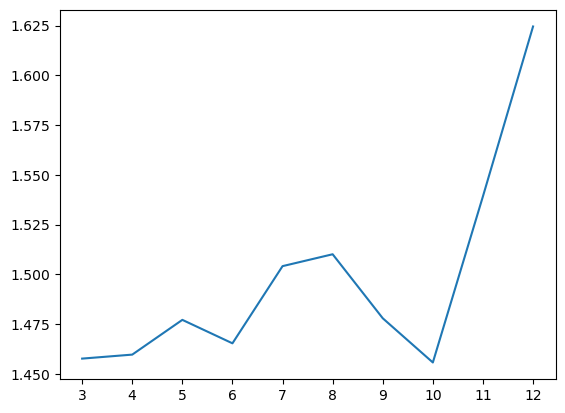

In [166]:
lt = [3,4,5,6,7,8,9,10,11,12]
acc = []
for num_clusters in lt:
    reduced_matrix = train_recommendations(train,num_clusters, 6)
    pred=test_recommendations(test.to_numpy(),reduced_matrix)
    acc.append(accuracy(pred,test.to_numpy()))
x = lt
default_x_ticks = range(len(x))
plt.plot(default_x_ticks, acc)
plt.xticks(default_x_ticks, x)
plt.show()   

{'1': [0, 1, 5, 10, 12, 17, 19, 21, 26, 27, 34, 36, 37, 43, 44, 47, 48, 52, 54, 56, 57, 62, 69, 70, 72, 79, 84, 86, 88, 90, 91, 94, 98, 99, 100, 102, 111, 112, 113, 115, 122, 124, 131, 132, 134, 135, 139, 140, 142, 143, 145, 150, 151], '0': [2, 4, 9, 13, 20, 24, 29, 30, 32, 35, 45, 51, 73, 77, 78, 81, 85, 96, 104, 105, 107, 108, 110, 118, 121, 138], '9': [3, 6, 15, 16, 22, 46, 58, 65, 87, 95, 109, 116, 119, 126, 129, 130, 136, 137, 144, 147, 148, 149], '2': [7, 23, 25, 39, 64, 93, 101, 114, 123, 125, 133, 141], '4': [8, 18, 41, 53, 55, 61, 66, 71, 75, 83, 97, 106, 120], '7': [11, 28, 31, 38, 40, 59, 63, 68, 74, 80, 127, 152], '3': [14, 33, 89], '6': [42, 50, 60, 76, 82, 92, 103, 117, 128, 146], '5': [49], '8': [67]}
(10, 25)
{'1': [0, 1, 5, 10, 12, 17, 19, 21, 26, 27, 34, 36, 37, 43, 44, 47, 48, 52, 54, 56, 57, 62, 69, 70, 72, 79, 84, 86, 88, 90, 91, 94, 98, 99, 100, 102, 111, 112, 113, 115, 122, 124, 131, 132, 134, 135, 139, 140, 142, 143, 145, 150, 151], '0': [2, 4, 9, 13, 20, 24, 29

/var/folders/sq/1c_479xx58d7g62wy3fqmnl80000gn/T/ipykernel_29369/665705604.py:11: RuntimeWarning: Mean of empty slice
  centr = np.nanmean(arr[np.array(cluster_dict[key])], axis = 0)
/var/folders/sq/1c_479xx58d7g62wy3fqmnl80000gn/T/ipykernel_29369/665705604.py:11: RuntimeWarning: Mean of empty slice
  centr = np.nanmean(arr[np.array(cluster_dict[key])], axis = 0)


{'1': [0, 1, 5, 10, 12, 17, 19, 21, 26, 27, 34, 36, 37, 43, 44, 47, 48, 52, 54, 56, 57, 62, 69, 70, 72, 79, 84, 86, 88, 90, 91, 94, 98, 99, 100, 102, 111, 112, 113, 115, 122, 124, 131, 132, 134, 135, 139, 140, 142, 143, 145, 150, 151], '0': [2, 4, 9, 13, 20, 24, 29, 30, 32, 35, 45, 51, 73, 77, 78, 81, 85, 96, 104, 105, 107, 108, 110, 118, 121, 138], '9': [3, 6, 15, 16, 22, 46, 58, 65, 87, 95, 109, 116, 119, 126, 129, 130, 136, 137, 144, 147, 148, 149], '2': [7, 23, 25, 39, 64, 93, 101, 114, 123, 125, 133, 141], '4': [8, 18, 41, 53, 55, 61, 66, 71, 75, 83, 97, 106, 120], '7': [11, 28, 31, 38, 40, 59, 63, 68, 74, 80, 127, 152], '3': [14, 33, 89], '6': [42, 50, 60, 76, 82, 92, 103, 117, 128, 146], '5': [49], '8': [67]}
(10, 25)
{'1': [0, 1, 5, 10, 12, 17, 19, 21, 26, 27, 34, 36, 37, 43, 44, 47, 48, 52, 54, 56, 57, 62, 69, 70, 72, 79, 84, 86, 88, 90, 91, 94, 98, 99, 100, 102, 111, 112, 113, 115, 122, 124, 131, 132, 134, 135, 139, 140, 142, 143, 145, 150, 151], '0': [2, 4, 9, 13, 20, 24, 29

/var/folders/sq/1c_479xx58d7g62wy3fqmnl80000gn/T/ipykernel_29369/665705604.py:11: RuntimeWarning: Mean of empty slice
  centr = np.nanmean(arr[np.array(cluster_dict[key])], axis = 0)
/var/folders/sq/1c_479xx58d7g62wy3fqmnl80000gn/T/ipykernel_29369/665705604.py:11: RuntimeWarning: Mean of empty slice
  centr = np.nanmean(arr[np.array(cluster_dict[key])], axis = 0)


{'1': [0, 1, 5, 10, 12, 17, 19, 21, 26, 27, 34, 36, 37, 43, 44, 47, 48, 52, 54, 56, 57, 62, 69, 70, 72, 79, 84, 86, 88, 90, 91, 94, 98, 99, 100, 102, 111, 112, 113, 115, 122, 124, 131, 132, 134, 135, 139, 140, 142, 143, 145, 150, 151], '0': [2, 4, 9, 13, 20, 24, 29, 30, 32, 35, 45, 51, 73, 77, 78, 81, 85, 96, 104, 105, 107, 108, 110, 118, 121, 138], '9': [3, 6, 15, 16, 22, 46, 58, 65, 87, 95, 109, 116, 119, 126, 129, 130, 136, 137, 144, 147, 148, 149], '2': [7, 23, 25, 39, 64, 93, 101, 114, 123, 125, 133, 141], '4': [8, 18, 41, 53, 55, 61, 66, 71, 75, 83, 97, 106, 120], '7': [11, 28, 31, 38, 40, 59, 63, 68, 74, 80, 127, 152], '3': [14, 33, 89], '6': [42, 50, 60, 76, 82, 92, 103, 117, 128, 146], '5': [49], '8': [67]}
(10, 25)
{'1': [0, 1, 5, 10, 12, 17, 19, 21, 26, 27, 34, 36, 37, 43, 44, 47, 48, 52, 54, 56, 57, 62, 69, 70, 72, 79, 84, 86, 88, 90, 91, 94, 98, 99, 100, 102, 111, 112, 113, 115, 122, 124, 131, 132, 134, 135, 139, 140, 142, 143, 145, 150, 151], '0': [2, 4, 9, 13, 20, 24, 29

/var/folders/sq/1c_479xx58d7g62wy3fqmnl80000gn/T/ipykernel_29369/665705604.py:11: RuntimeWarning: Mean of empty slice
  centr = np.nanmean(arr[np.array(cluster_dict[key])], axis = 0)
/var/folders/sq/1c_479xx58d7g62wy3fqmnl80000gn/T/ipykernel_29369/665705604.py:11: RuntimeWarning: Mean of empty slice
  centr = np.nanmean(arr[np.array(cluster_dict[key])], axis = 0)


{'1': [0, 1, 5, 10, 12, 17, 19, 21, 26, 27, 34, 36, 37, 43, 44, 47, 48, 52, 54, 56, 57, 62, 69, 70, 72, 79, 84, 86, 88, 90, 91, 94, 98, 99, 100, 102, 111, 112, 113, 115, 122, 124, 131, 132, 134, 135, 139, 140, 142, 143, 145, 150, 151], '0': [2, 4, 9, 13, 20, 24, 29, 30, 32, 35, 45, 51, 73, 77, 78, 81, 85, 96, 104, 105, 107, 108, 110, 118, 121, 138], '9': [3, 6, 15, 16, 22, 46, 58, 65, 87, 95, 109, 116, 119, 126, 129, 130, 136, 137, 144, 147, 148, 149], '2': [7, 23, 25, 39, 64, 93, 101, 114, 123, 125, 133, 141], '4': [8, 18, 41, 53, 55, 61, 66, 71, 75, 83, 97, 106, 120], '7': [11, 28, 31, 38, 40, 59, 63, 68, 74, 80, 127, 152], '3': [14, 33, 89], '6': [42, 50, 60, 76, 82, 92, 103, 117, 128, 146], '5': [49], '8': [67]}
(10, 25)
{'1': [0, 1, 5, 10, 12, 17, 19, 21, 26, 27, 34, 36, 37, 43, 44, 47, 48, 52, 54, 56, 57, 62, 69, 70, 72, 79, 84, 86, 88, 90, 91, 94, 98, 99, 100, 102, 111, 112, 113, 115, 122, 124, 131, 132, 134, 135, 139, 140, 142, 143, 145, 150, 151], '0': [2, 4, 9, 13, 20, 24, 29

/var/folders/sq/1c_479xx58d7g62wy3fqmnl80000gn/T/ipykernel_29369/665705604.py:11: RuntimeWarning: Mean of empty slice
  centr = np.nanmean(arr[np.array(cluster_dict[key])], axis = 0)
/var/folders/sq/1c_479xx58d7g62wy3fqmnl80000gn/T/ipykernel_29369/665705604.py:11: RuntimeWarning: Mean of empty slice
  centr = np.nanmean(arr[np.array(cluster_dict[key])], axis = 0)


{'1': [0, 1, 5, 10, 12, 17, 19, 21, 26, 27, 34, 36, 37, 43, 44, 47, 48, 52, 54, 56, 57, 62, 69, 70, 72, 79, 84, 86, 88, 90, 91, 94, 98, 99, 100, 102, 111, 112, 113, 115, 122, 124, 131, 132, 134, 135, 139, 140, 142, 143, 145, 150, 151], '0': [2, 4, 9, 13, 20, 24, 29, 30, 32, 35, 45, 51, 73, 77, 78, 81, 85, 96, 104, 105, 107, 108, 110, 118, 121, 138], '9': [3, 6, 15, 16, 22, 46, 58, 65, 87, 95, 109, 116, 119, 126, 129, 130, 136, 137, 144, 147, 148, 149], '2': [7, 23, 25, 39, 64, 93, 101, 114, 123, 125, 133, 141], '4': [8, 18, 41, 53, 55, 61, 66, 71, 75, 83, 97, 106, 120], '7': [11, 28, 31, 38, 40, 59, 63, 68, 74, 80, 127, 152], '3': [14, 33, 89], '6': [42, 50, 60, 76, 82, 92, 103, 117, 128, 146], '5': [49], '8': [67]}
(10, 25)


/var/folders/sq/1c_479xx58d7g62wy3fqmnl80000gn/T/ipykernel_29369/665705604.py:11: RuntimeWarning: Mean of empty slice
  centr = np.nanmean(arr[np.array(cluster_dict[key])], axis = 0)


([<matplotlib.axis.XTick at 0x147892250>,
 [Text(0, 0, '2'),
  Text(1, 0, '3'),
  Text(2, 0, '4'),
  Text(3, 0, '5'),
  Text(4, 0, '6'),
  Text(5, 0, '7'),
  Text(6, 0, '8'),
  Text(7, 0, '9'),
  Text(8, 0, '10')])

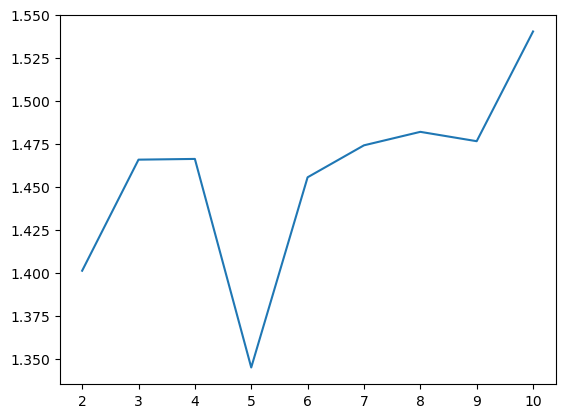

In [165]:
k_list = [2,3,4,5,6,7,8,9,10]
acc = []
for k_svd in k_list:
    reduced_matrix = train_recommendations(train,10, k_svd)
    pred=test_recommendations(test.to_numpy(),reduced_matrix)
    acc.append(accuracy(pred,test.to_numpy()))
x = k_list
default_x_ticks = range(len(x))
plt.plot(default_x_ticks, acc)
plt.xticks(default_x_ticks, x)

In [158]:
for i in pred:
    elective_ranked = get_electives_ranked(courses,i)
    print(elective_ranked)
    print("*****************")

['Machine Learning\n', 'Software Production Engineering\n', 'The Web and the Mind ', 'Mathematics For Machine Learning\n', 'Cloud Computing\n', 'Visual Recognition\n', 'Techno-economics of networks ', 'Programming Languages\n', 'Reinforcement Learning', 'Data Visualization\n', 'Technology Ethics and AI ', 'Natural Language Processing\n', 'Privacy in the Digital Age', 'Digital Sociology ', 'Computer Graphics\n', 'System design with FPGA ', 'Digital CMOS VLSI Design ', 'ASIC design ', 'VLSI Architecture Design\n', 'High level synthesis and optimization of Digital Circuits ']
*****************
['Machine Learning\n', 'Data Visualization\n', 'The Web and the Mind ', 'Privacy in the Digital Age', 'Reinforcement Learning', 'Software Production Engineering\n', 'Techno-economics of networks ', 'Technology Ethics and AI ', 'Mathematics For Machine Learning\n', 'Cloud Computing\n', 'Visual Recognition\n', 'Programming Languages\n', 'Computer Graphics\n', 'Natural Language Processing\n', 'System d

In [ ]:
df

https://medium.com/more-python-less-problems/principal-component-analysis-and-k-means-clustering-to-visualize-a-high-dimensional-dataset-577b2a7a5fe2

In [ ]:
from sklearn.decomposition import PCA
X_std = StandardScaler().fit_transform(df)
pca = PCA(n_components=4)
principalComponents = pca.fit_transform(X_std)
# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)
# Save components to a DataFrame
PCA_components = pd.DataFrame(principalComponents)

In [ ]:
plt.scatter(PCA_components[1], PCA_components[2], alpha=.5, color='black')
plt.xlabel('PCA 2')
plt.ylabel('PCA 3')


In [ ]:
ks = range(1, 10)
inertias = []
for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(PCA_components.iloc[:,:3])
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()